# Autoencoder test
based on https://debuggercafe.com/implementing-deep-autoencoder-in-pytorch/

## Load the libraries

In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
import torch.utils.data as data_utils
import matplotlib.pyplot as plt

## Load the same dataset as in playground

In [2]:
complete_data = pd.read_csv(f'../prepared_data/gmsc.csv', sep=',')
complete_data['BAD'] = np.where(complete_data['BAD'] == 'BAD', 1, 0).astype(np.int64)
complete_X = complete_data.iloc[:, complete_data.columns != 'BAD']
complete_y = complete_data['BAD']
print(complete_X.shape)

(150000, 68)


In [3]:
## Make test and train set

In [4]:
trainset, testset, train_y, test_y = train_test_split(complete_X, complete_y, test_size=0.1, stratify=complete_y, random_state=123)

Pytorch usually expects a tensor (multidimensional matrix) we need to create one from our dataset

In [5]:
train_data = data_utils.TensorDataset(torch.Tensor(trainset.values), torch.Tensor(train_y.values))

## Data preparation

set some training variables and initialize the data loader

In [6]:
BATCH_SIZE = 1000
NUM_EPOCHS = 50

trainloader = data_utils.DataLoader(
    train_data, 
    batch_size=BATCH_SIZE,
    shuffle=True
)

## Build an autoencoder class
The class expects the number of features to match the input/output size. Then it builds an tiny autoencoder with two layers.

Idealy we would make this more custumizable to change more parameters to compare them with each other.

In [7]:
class autoencoder(nn.Module):
    def __init__(self, features):
        super(autoencoder,self).__init__()

        self.enc1 = nn.Linear(in_features = features, out_features=5)
        self.enc2 = nn.Linear(in_features = 5, out_features=2)

        self.dec2 = nn.Linear(in_features = 2, out_features = 5)
        self.dec1 = nn.Linear(in_features = 5, out_features = features)

    def forward(self, x):
        x = nn.functional.relu(self.enc1(x))
        x = nn.functional.relu(self.enc2(x))
        x = nn.functional.relu(self.dec2(x))
        x = nn.functional.relu(self.dec1(x))
        return x

net = autoencoder(trainset.shape[1])
print(net)

autoencoder(
  (enc1): Linear(in_features=68, out_features=5, bias=True)
  (enc2): Linear(in_features=5, out_features=2, bias=True)
  (dec2): Linear(in_features=2, out_features=5, bias=True)
  (dec1): Linear(in_features=5, out_features=68, bias=True)
)


## Define the training on any autoencoder

In [8]:
def train(net, trainloader, epochs):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(net.parameters(),lr=1e-3)

    train_loss = []
    for epoch in range(epochs):
        running_loss = 0.0
        for data in trainloader:
            features, _ = data
            optimizer.zero_grad()
            outputs = net(features)
            loss = criterion(outputs, features)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        loss = running_loss / len(trainloader)
        train_loss.append(loss)
        
        print('Epoch {} of {}, Train Loss: {:.3f}'.format(epoch+1, NUM_EPOCHS, loss))

    return outputs, train_loss

## Load the autoencoder network

In [9]:
def get_device():
    if torch.cuda.is_available():
        device = 'cuda:0'
    else:
        device = 'cpu'
    return device

device = get_device()
print(device)
# load the neural network onto the device
net.to(device)

cpu


autoencoder(
  (enc1): Linear(in_features=68, out_features=5, bias=True)
  (enc2): Linear(in_features=5, out_features=2, bias=True)
  (dec2): Linear(in_features=2, out_features=5, bias=True)
  (dec1): Linear(in_features=5, out_features=68, bias=True)
)

## Train \o/

In [10]:
trained_data, train_loss = train(net, trainloader, NUM_EPOCHS)

Epoch 1 of 50, Train Loss: 2970634.231
Epoch 2 of 50, Train Loss: 2900303.589
Epoch 3 of 50, Train Loss: 2797608.410
Epoch 4 of 50, Train Loss: 2649546.505
Epoch 5 of 50, Train Loss: 2343499.830
Epoch 6 of 50, Train Loss: 1891224.641
Epoch 7 of 50, Train Loss: 1393842.245
Epoch 8 of 50, Train Loss: 920439.009
Epoch 9 of 50, Train Loss: 577345.090
Epoch 10 of 50, Train Loss: 353962.619
Epoch 11 of 50, Train Loss: 260759.164
Epoch 12 of 50, Train Loss: 235046.036
Epoch 13 of 50, Train Loss: 230463.334
Epoch 14 of 50, Train Loss: 229533.310
Epoch 15 of 50, Train Loss: 229274.647
Epoch 16 of 50, Train Loss: 229106.397
Epoch 17 of 50, Train Loss: 228916.094
Epoch 18 of 50, Train Loss: 228783.499
Epoch 19 of 50, Train Loss: 228616.579
Epoch 20 of 50, Train Loss: 228471.227
Epoch 21 of 50, Train Loss: 228362.322
Epoch 22 of 50, Train Loss: 228224.326
Epoch 23 of 50, Train Loss: 228127.968
Epoch 24 of 50, Train Loss: 228014.676
Epoch 25 of 50, Train Loss: 227952.424
Epoch 26 of 50, Train Loss:

## How did it go?

<module 'matplotlib.pyplot' from 'C:\\Users\\haase.PAPMEIER\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python39\\site-packages\\matplotlib\\pyplot.py'>

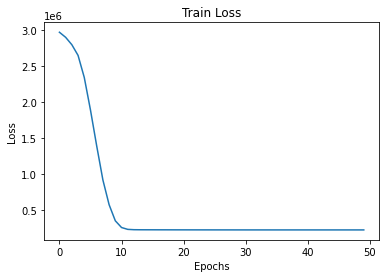

In [11]:
plt.figure()
plt.plot(train_loss)
plt.title('Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt